In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from IPython.display import display
features = ['Area',
            'Perimeter',
            'Compactness',
            'Length ',
            'Width',
            'Asymmetry coefficient',
            ' groove.']

In [36]:
#First load the dataset
Wseeds = pd.read_csv('../Documents/Wheat.csv')
Wseeds

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetric Coeff.,Length of Kernel Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [37]:
#Now split the dataset into 2 feature (X,y) and train and test those features
X = Wseeds.iloc[:, :-1].values
y = Wseeds.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=62)

In [38]:
#Creating and evaluating the Logistic regression model
lr = LogisticRegression(random_state=62)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)
print("Logistic regression accuracy:", lr_acc)

Logistic regression accuracy: 0.8843537414965986


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
#Creating and evaluating the Multi-layer Perceptron model
mlp = MLPClassifier(hidden_layer_sizes=(4, 8), max_iter=500, random_state=62)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_pred)
mlp_cm = confusion_matrix(y_test, mlp_pred)
print("Multi-layer Perceptron accuracy:", mlp_acc)

Multi-layer Perceptron accuracy: 0.6462585034013606


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


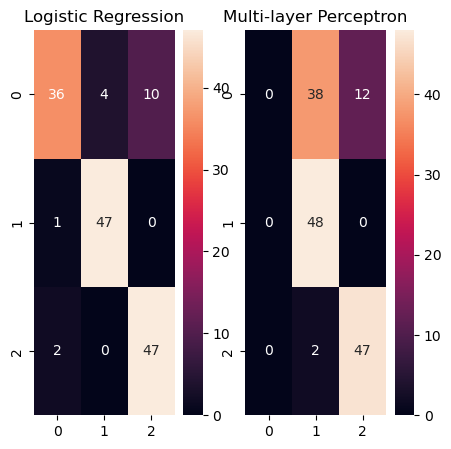

In [40]:
#Compare the logistic regression and multi layer perceotron model through visulaization.
fig, ax = plt.subplots(1, 2, figsize=(5, 5))
sns.heatmap(logreg_cm, annot=True, fmt='d', ax=ax[0])
sns.heatmap(mlp_cm, annot=True, fmt='d', ax=ax[1])
ax[0].set_title('Logistic Regression')
ax[1].set_title('Multi-layer Perceptron')
plt.show()